# Proyek Analisis Data: Bike Sharing
- **Nama:** Wilbert Neilson Sachio
- **Email:** willbert1206@gmail.com
- **ID Dicoding:** wilbertneilsonsachio

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi weather dan season terhadap jumlah sepeda yang disewa?
- Bagaimana tren penyewaan sepeda bervariasi berdasarkan jam dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

## Data Wrangling

### Gathering Data

In [60]:
# Gather data dari file direktori 
data = pd.read_csv("./data/hour.csv")

### Assessing Data

In [61]:
# Tampilkan head dan tail data
print(data.head())
print(data.tail())
# Cek missing values dan tipe data
print(data.info())

# Summary statistics
print(data.describe())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  01/01/2011       1   0     1   0        0        6           0   
1        2  01/01/2011       1   0     1   1        0        6           0   
2        3  01/01/2011       1   0     1   2        0        6           0   
3        4  01/01/2011       1   0     1   3        0        6           0   
4        5  01/01/2011       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  
       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
17374    17375  31/12/2012   

### Cleaning Data

In [62]:
# Buat Fungsi untuk mencari IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Kolom2 yang akan di cek dengan IQR
numeric_columns = ['cnt', 'temp', 'atemp', 'hum', 'windspeed', 'weathersit']

# Cek Outlier dengan IQR
for column in numeric_columns:
    outliers = detect_outliers_iqr(data, column)
    print(f"Outliers for {column} using IQR:")
    print(outliers)
    print(f"Number of outliers in {column}: {len(outliers)}\n")

# Drop Outlier dari dataset
for column in numeric_columns:
    outliers = detect_outliers_iqr(data, column)
    data = data[~data.index.isin(outliers.index)]

# Drop kolom yang irrelevant
data_cleaned = data.drop(columns=['instant', 'dteday'])

# konversi tipe data
data_cleaned['season'] = data_cleaned['season'].astype('category')
data_cleaned['weathersit'] = data_cleaned['weathersit'].astype('category')

data_cleaned.to_csv('cleaned_data.csv', index=False)


Outliers for cnt using IQR:
       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
5536      5537  23/08/2011       3   0     8  14        0        2   
10358    10359  12/03/2012       1   1     3  17        0        1   
10359    10360  12/03/2012       1   1     3  18        0        1   
10382    10383  13/03/2012       1   1     3  17        0        2   
10383    10384  13/03/2012       1   1     3  18        0        2   
...        ...         ...     ...  ..   ...  ..      ...      ...   
16885    16886  11/12/2012       4   1    12   8        0        2   
16909    16910  12/12/2012       4   1    12   8        0        3   
16933    16934  13/12/2012       4   1    12   8        0        4   
17053    17054  18/12/2012       4   1    12   8        0        2   
17077    17078  19/12/2012       4   1    12   8        0        3   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
5536            1           1  0.72  0.6515  0.30     0.089

## Exploratory Data Analysis (EDA)

In [63]:
# Matriks korelasi untuk mengetahui hubungan antar variabel
correlation_matrix = data_cleaned.corr()
print(correlation_matrix['cnt'].sort_values(ascending=False))

cnt           1.000000
registered    0.967473
casual        0.720468
hr            0.424303
temp          0.399788
atemp         0.396504
yr            0.190056
season        0.171375
mnth          0.114560
windspeed     0.114237
weekday       0.025513
workingday   -0.002483
holiday      -0.020712
weathersit   -0.136328
hum          -0.338481
Name: cnt, dtype: float64


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh kondisi weather dan season terhadap jumlah sepeda yang disewa?

C:\Users\willb\AppData\Local\Temp\ipykernel_17148\1523235754.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_weather_group = data_cleaned.groupby(['season', 'weathersit']).agg({'cnt': 'mean'}).reset_index()


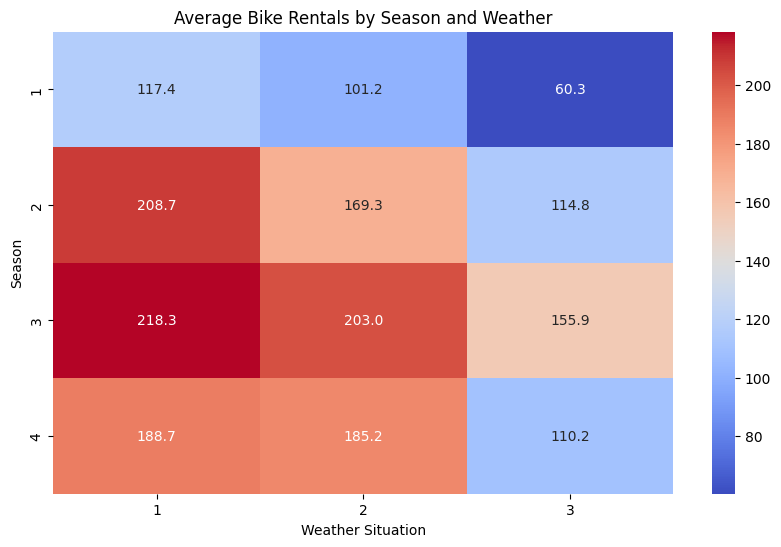

Mean Squared Error: 17270.23681687569
R Squared: 0.2816035859135825


In [64]:
# Gabungkan season dan weather situation
season_weather_group = data_cleaned.groupby(['season', 'weathersit']).agg({'cnt': 'mean'}).reset_index()

# Buat pivot tablenya
season_weather_pivot = season_weather_group.pivot(index='season', columns='weathersit', values='cnt')

# Visualisasikan dengan menggunakan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(season_weather_pivot, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Average Bike Rentals by Season and Weather')
plt.xlabel('Weather Situation')
plt.ylabel('Season')
plt.show()

# Analisis dengan model regresi
X = data_cleaned[['season', 'weathersit', 'temp', 'hum', 'windspeed']]
y = data_cleaned['cnt']

# Encode variabel kategorikal
X = pd.get_dummies(X, columns=['season', 'weathersit'], drop_first=True)

# Pisahkan Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model regresi
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R Squared: {r2}")


### Pertanyaan 2: Bagaimana tren penyewaan sepeda bervariasi berdasarkan jam dalam sehari?

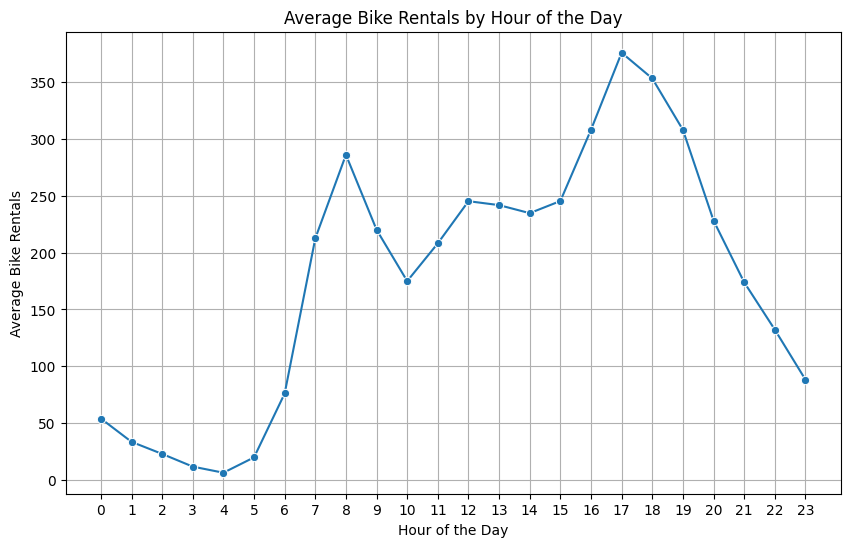

In [65]:
# Gabungkan berdasarkan jam dan hitung rata-rata
hourly_rentals = data_cleaned.groupby('hr').agg({'cnt': 'mean'}).reset_index()

# Plot tren penyewaan berdasarkan jam
plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='cnt', data=hourly_rentals, marker='o')
plt.title('Average Bike Rentals by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Bike Rentals')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

In [66]:
data.to_csv("all_data.csv", index=False)

## Conclusion

### Pertanyaan 1: 
Hasil analisis menunjukkan bahwa jumlah penyewaan sepeda tertinggi terjadi pada musim gugur (season 3) dengan kondisi cuaca cerah atau berawan sebagian (weather 1), yang dapat disebabkan oleh suhu yang nyaman dan cuaca yang mendukung untuk aktivitas di luar ruangan. Sebaliknya, penyewaan sepeda terendah terjadi pada musim semi (season 1) dengan kondisi cuaca berupa hujan ringan atau salju ringan (weather 3), yang membuat aktivitas di luar ruangan seperti bersepeda menjadi kurang nyaman.

### Pertanyaan 2: 
Dari visualisasi tren per jam, puncak penyewaan terjadi pada pagi hari sekitar pukul 8 dan sore hari sekitar pukul 17-18. Hal ini mengindikasikan bahwa sepeda banyak digunakan oleh pekerja yang bepergian selama jam sibuk.